In [9]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
import matplotlib.font_manager as fm
import palettable
plot_root = '../plots'

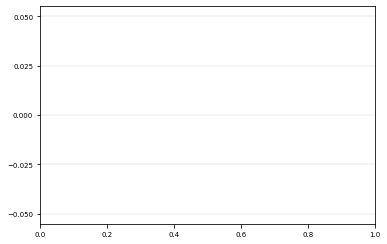

In [3]:
mpl.__version__
mpl.rcParams.update({'font.size': 7})
mpl.rcParams['axes.grid'] = True
mpl.rcParams.update({'axes.grid.axis':'y','grid.color':'#949494','grid.linewidth':0.2})
plt.locator_params(axis='y', nbins=5)   # y-axis

In [4]:
df_2 = pd.read_csv('../output_theta2/output_case3_analytical.csv')
df_4 = pd.read_csv('../output_theta4/output_case3_analytical.csv')
df_8 = pd.read_csv('../output_theta8/output_case3_analytical.csv')
plot_root = '../plots'

In [31]:
Qeworld = 32.2760
df_2['Qeworld_chg']=-(df_2['Qeworld_prime']-32.2760)/32.2760*100
df_4['Qeworld_chg']=-(df_4['Qeworld_prime']-32.2760)/32.2760*100
df_8['Qeworld_chg']=-(df_8['Qeworld_prime']-32.2760)/32.2760*100
df_2['chg_Qeworld']=df_2['chg_Qeworld']/Qeworld*100
df_4['chg_Qeworld']=df_4['chg_Qeworld']/Qeworld*100
df_8['chg_Qeworld']=df_8['chg_Qeworld']/Qeworld*100
df_2

,Unnamed: 0,tax_sce,regionbase,varphi,pe,tb,prop,te,jxbar_prime,jmbar_prime,...,chg_production,chg_consumption,chg_Qeworld,pai_g,subsidy_ratio,welfare,welfare_noexternality,region_scenario,conv,Qeworld_chg
0,0,Unilateral,US as Home,0.0,1.000000,0.000000,0.411799,0.0,0.015921,0.793579,...,-3.268083e-07,7.124784e-07,0.000003,-3.370090e-08,0.000000,-0.000005,-0.000005,1.0,1.0,0.000028
1,6,Unilateral,US as Home,0.1,0.998752,0.034739,0.000000,0.1,0.015923,0.793579,...,-6.269528e-03,1.890139e-02,-0.523263,-9.413296e-02,0.005190,0.021913,-0.021806,1.0,1.0,0.523294
2,12,Unilateral,US as Home,0.2,0.997896,0.069419,0.000091,0.2,0.015930,0.793579,...,-2.072373e-02,2.839438e-02,-1.044287,-1.891988e-01,0.010327,0.087356,-0.087148,1.0,1.0,1.044318
3,18,Unilateral,US as Home,0.3,0.997415,0.104080,0.000055,0.3,0.015941,0.793579,...,-4.319764e-02,2.874362e-02,-1.565202,-2.852675e-01,0.015411,0.196400,-0.195925,1.0,1.0,1.565233
4,24,Unilateral,US as Home,0.4,0.997303,0.138758,0.000036,0.4,0.015956,0.793579,...,-7.370434e-02,2.002651e-02,-2.088070,-3.824218e-01,0.020443,0.348948,-0.348897,1.0,1.0,2.088101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11035,1355,EPC_hybrid,US and EU as Home,45.0,0.893456,15.251869,0.841222,45.0,0.022703,0.792003,...,9.583382e-01,2.267209e+00,-21.337875,-7.566471e+01,0.719148,442.204701,-34.166036,7.0,1.0,21.337918
11036,1361,EPC_hybrid,US and EU as Home,46.0,0.893162,15.585545,0.843979,46.0,0.022682,0.792003,...,9.644386e-01,2.275256e+00,-21.350803,-7.733024e+01,0.723564,452.793723,-34.458061,7.0,1.0,21.350846
11037,1367,EPC_hybrid,US and EU as Home,47.0,0.892880,15.919194,0.846642,47.0,0.022661,0.792003,...,9.703074e-01,2.282994e+00,-21.363226,-7.899573e+01,0.727843,463.389393,-34.744508,7.0,1.0,21.363270
11038,1373,EPC_hybrid,US and EU as Home,48.0,0.892609,16.252840,0.849216,48.0,0.022641,0.792003,...,9.759441e-01,2.290428e+00,-21.375153,-8.066124e+01,0.731992,473.990895,-35.025622,7.0,1.0,21.375197


In [5]:
def plot_all(df, x, y):
    regions = df['regionbase'].unique()
    #plt.xlim(0,15)
    for reg in regions:
        df1=df[(df['regionbase']==reg) & (df['tax_sce'] == 'Unilateral')] 
        plt.plot(df1[x],df1[y],linestyle='dashed',dashes = (5,2),label = reg)
    plt.legend()
    return plt

def plot_alltax(df, x, y, ax = plt):
    taxes = df['tax_sce'].unique()
    #plt.xlim(0,15)
    for tax in taxes:
        df_temp=df[(df['tax_sce']==tax) & (df['regionbase'] == 'OECD37 as Home')] 
        ax.plot(df_temp[x],df_temp[y],linestyle='dashed',dashes = (5,2),label = tax)
    #ax.legend()
    return ax

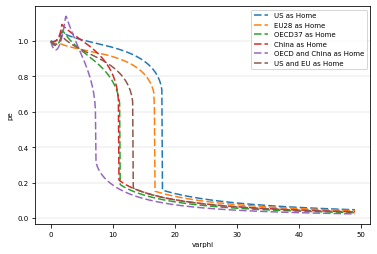

In [13]:
plot_all(df_8, 'varphi', 'pe')
plt.xlabel('varphi')
plt.ylabel('pe')
plt.savefig(plot_root + '/theta8_drop.pdf', format = 'PDF')

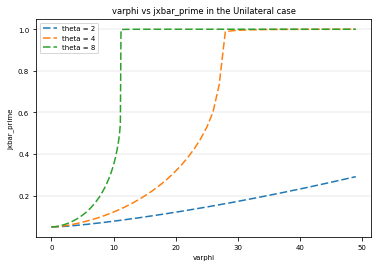

In [157]:
df1 = df_2[(df_2['regionbase']=='OECD37 as Home') & (df_2['tax_sce'] == 'Unilateral')] 
df2 = df_4[(df_4['regionbase']=='OECD37 as Home') & (df_4['tax_sce'] == 'Unilateral')] 
df3 = df_8[(df_4['regionbase']=='OECD37 as Home') & (df_8['tax_sce'] == 'Unilateral')] 
plt.plot(df1['varphi'], df1['jxbar_prime'], dashes = (5,2),label = 'theta = 2')
plt.plot(df2['varphi'], df2['jxbar_prime'], dashes = (5,2),label = 'theta = 4')
plt.plot(df3['varphi'], df3['jxbar_prime'], dashes = (5,2),label = 'theta = 8')
plt.legend()
plt.ylabel('jxbar_prime')
plt.xlabel('varphi')
plt.title('varphi vs jxbar_prime in the Unilateral case')
plt.savefig(plot_root + '/theta_phi_jxbar.pdf', format='PDF')
#plt.plot()

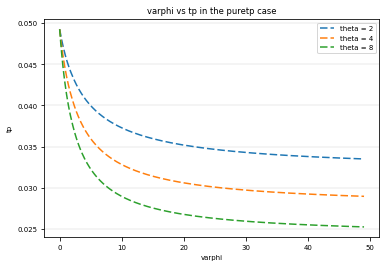

In [156]:
df1 = df_2[(df_2['regionbase']=='OECD37 as Home') & (df_2['tax_sce'] == 'EPC_hybrid')] 
df2 = df_4[(df_4['regionbase']=='OECD37 as Home') & (df_4['tax_sce'] == 'EPC_hybrid')] 
df3 = df_8[(df_8['regionbase']=='OECD37 as Home') & (df_8['tax_sce'] == 'EPC_hybrid')] 
plt.plot(df1['varphi'], df1['jxbar_prime'], dashes = (5,2),label = 'theta = 2')
plt.plot(df2['varphi'], df2['jxbar_prime'], dashes = (5,2),label = 'theta = 4')
plt.plot(df3['varphi'], df3['jxbar_prime'], dashes = (5,2),label = 'theta = 8')
plt.legend()
plt.ylabel('tp')
plt.xlabel('varphi')
plt.title('varphi vs tp in the puretp case')
plt.savefig(plot_root + '/theta_phi_tp.pdf', format='PDF')
#plt.plot()

Text(0.5, 1.0, 'varphi vs tp in the puretp case')

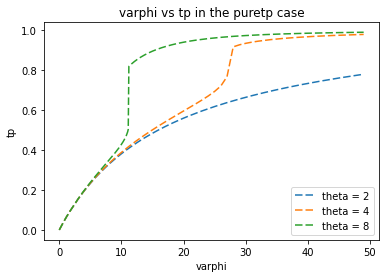

In [53]:
df1 = df_2[(df_2['regionbase']=='OECD37 as Home') & (df_2['tax_sce'] == 'Unilateral')] 
df2 = df_4[(df_4['regionbase']=='OECD37 as Home') & (df_4['tax_sce'] == 'Unilateral')] 
df3 = df_8[(df_8['regionbase']=='OECD37 as Home') & (df_8['tax_sce'] == 'Unilateral')] 
plt.plot(df1['varphi'], df1['subsidy_ratio'], dashes = (5,2),label = 'theta = 2')
plt.plot(df2['varphi'], df2['subsidy_ratio'], dashes = (5,2),label = 'theta = 4')
plt.plot(df3['varphi'], df3['subsidy_ratio'], dashes = (5,2),label = 'theta = 8')
plt.legend()
plt.ylabel('tp')
plt.xlabel('varphi')
plt.title('varphi vs tp in the puretp case')

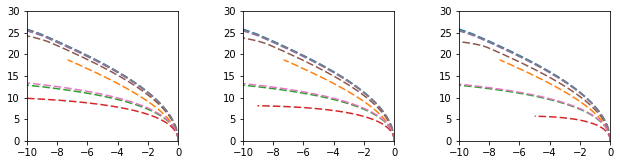

In [83]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.set_position([.1, .4, .35, .45])
ax2.set_position([.6, .4, .35, .45])
ax3.set_position([1.1, .4, .35, .45])
plot_alltax(df_2, 'welfare_noexternality', 'Qeworld_chg', ax1)
plot_alltax(df_4, 'welfare_noexternality', 'Qeworld_chg', ax2)
plot_alltax(df_8, 'welfare_noexternality', 'Qeworld_chg', ax3)
ax1.set_ylim([ 0, 30])
ax2.set_ylim([0, 30])
ax3.set_ylim([0, 30])
ax1.set_xlim([-10, 0])
ax2.set_xlim([-10, 0])
ax3.set_xlim([-10, 0])
plt.savefig(plot_root + '/theta_wf_cons.pdf', format='PDF')

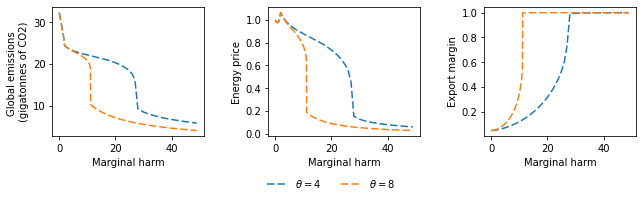

In [112]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.set_position([.1, .4, .35, .45])
ax2.set_position([.6, .4, .35, .45])
ax3.set_position([1.1, .4, .35, .45])
df1 = df_2[(df_2['regionbase']=='OECD37 as Home') & (df_2['tax_sce'] == 'Unilateral')] 
df2 = df_4[(df_4['regionbase']=='OECD37 as Home') & (df_4['tax_sce'] == 'Unilateral')] 
df3 = df_8[(df_8['regionbase']=='OECD37 as Home') & (df_8['tax_sce'] == 'Unilateral')] 
l1,=ax1.plot(df2['varphi'], df2['Qeworld_prime'], dashes = (5,2),label = 'theta = 4')
l2,= ax1.plot(df3['varphi'], df3['Qeworld_prime'], dashes = (5,2),label = 'theta = 8')

ax2.plot(df2['varphi'], df2['pe'], dashes = (5,2),label = 'theta = 4')
ax2.plot(df3['varphi'], df3['pe'], dashes = (5,2),label = 'theta = 8')

ax3.plot(df2['varphi'], df2['jxbar_prime'], dashes = (5,2),label = 'theta = 4')
ax3.plot(df3['varphi'], df3['jxbar_prime'], dashes = (5,2),label = 'theta = 8')

ax1.set_xlabel('Marginal harm')
ax2.set_xlabel('Marginal harm')
ax3.set_xlabel('Marginal harm')
ax1.set_ylabel('Global emissions \n(gigatonnes of CO2)')
ax2.set_ylabel('Energy price')
ax3.set_ylabel('Export margin')
ax3.legend(handles=[l1,l2,l3], labels=[r"$\theta=4$", r"$\theta=8$"], loc='upper left', bbox_to_anchor=(-1.5, -0.25),fancybox=True, shadow=False, ncol=4, frameon=False)

C:\Users\Alex\AppData\Local\Temp/ipykernel_19052/3252994551.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['eff_te']=df1['te']-df1['tb']
C:\Users\Alex\AppData\Local\Temp/ipykernel_19052/3252994551.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['eff_te']=df1['te']-df1['tb']
C:\Users\Alex\AppData\Local\Temp/ipykernel_19052/3252994551.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

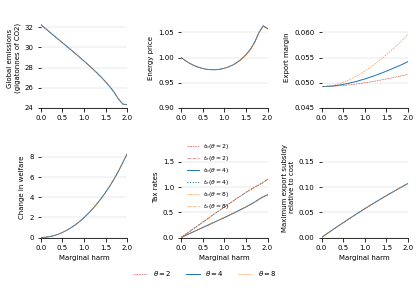

In [175]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
ax1.set_position([.1, .6, .2, .35])
ax2.set_position([.425, .6, .2, .35])
ax3.set_position([.75, .6, .2, .35])
ax4.set_position([.1, .15, .2, .35])
ax5.set_position([.425, .15, .2, .35])
ax6.set_position([.75, .15, .2, .35])


for ax in fig.get_axes():
    ax.set_xlim(0,2)
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    

df1 = df_2[(df_2['regionbase']=='OECD37 as Home') & (df_2['tax_sce'] == 'Unilateral')] 
df1['eff_te']=df1['te']-df1['tb']
l3,=ax1.plot(df1['varphi'],df1['Qeworld_prime'], color='C3',linewidth=0.5,linestyle='dashed')
ax2.plot(df1['varphi'],df1['pe'], color='C3',linewidth=0.5,linestyle='dashed')
ax3.plot(df1['varphi'],df1['jxbar_prime'], color='C3',linewidth=0.5,linestyle='dashed')
ax4.plot(df1['varphi'],df1['welfare'], color='C3',linewidth=0.5,linestyle='dashed')
ax5.plot(df1['varphi'],df1['tb'], color='C3',linewidth=0.5,linestyle='dashed')
ax5.plot(df1['varphi'],df1['eff_te'], color='C3',linewidth=0.5,linestyle='dashdot')
ax6.plot(df1['varphi'],df1['subsidy_ratio'], color='C3',linewidth=0.5,linestyle='dashed')
    

df1 = df_4[(df_4['regionbase']=='OECD37 as Home') & (df_4['tax_sce'] == 'Unilateral')] 
df1['eff_te']=df1['te']-df1['tb']
l1,=ax1.plot(df1['varphi'],df1['Qeworld_prime'], color='C0',linewidth=1)
ax2.plot(df1['varphi'],df1['pe'], color='C0',linewidth=1)
ax3.plot(df1['varphi'],df1['jxbar_prime'], color='C0',linewidth=1)
ax4.plot(df1['varphi'],df1['welfare'], color='C0',linewidth=1)
ax5.plot(df1['varphi'],df1['tb'], color='C0',linewidth=1)
ax5.plot(df1['varphi'],df1['eff_te'], linestyle='dotted', color='C0',linewidth=1)
ax6.plot(df1['varphi'],df1['subsidy_ratio'], color='C0',linewidth=1)

df1 = df_8[(df_8['regionbase']=='OECD37 as Home') & (df_8['tax_sce'] == 'Unilateral')] 
df1['eff_te']=df1['te']-df1['tb']
l2,=ax1.plot(df1['varphi'],df1['Qeworld_prime'], color='C1',linewidth=0.5,linestyle='dashed')
ax2.plot(df1['varphi'],df1['pe'], color='C1',linewidth=0.5,linestyle='dashed')
ax3.plot(df1['varphi'],df1['jxbar_prime'], color='C1',linewidth=0.5,linestyle='dashed')
ax4.plot(df1['varphi'],df1['welfare'], color='C1',linewidth=0.5,linestyle='dashed')
ax5.plot(df1['varphi'],df1['tb'], color='C1',linewidth=0.5,linestyle='dashed')
ax5.plot(df1['varphi'],df1['eff_te'], color='C1',linewidth=0.5,linestyle='dashdot')
ax6.plot(df1['varphi'],df1['subsidy_ratio'], color='C1',linewidth=0.5,linestyle='dashed')

ax4.set_xlabel('Marginal harm')
ax5.set_xlabel('Marginal harm')
ax6.set_xlabel('Marginal harm')
ax1.set_ylabel('Global emissions \n(gigatonnes of CO2)')
ax2.set_ylabel('Energy price')
ax3.set_ylabel('Export margin')
ax4.set_ylabel('Change in welfare')
ax5.set_ylabel('Tax rates')
ax6.set_ylabel('Maximum export subsidy \nrelative to cost')

ax1.set_ylim(24, 34)
ax2.set_ylim(0.9, 1.1)
ax3.set_ylim(0.045, 0.065)
ax4.set_ylim(0, 10)
ax5.set_ylim(0, 2)
ax6.set_ylim(0, 0.2)

ax1.set_yticks([24,26,28,30,32])
ax2.set_yticks([0.9,0.95,1.0,1.05])
ax3.set_yticks([0.045, 0.050, 0.055, 0.060])
ax4.set_yticks([0,2,4,6,8])
ax5.set_yticks([0,0.5,1,1.5])
ax6.set_yticks([0,0.05,0.1,0.15])

ax5.legend( (r"$t_b (\theta = 2)$", r"$t_e (\theta = 2)$", r"$t_b (\theta = 4)$", r"$t_e (\theta = 4)$", r"$t_b (\theta = 8)$", r"$t_e (\theta = 8)$"),fontsize=6, loc='upper left', 
            shadow=False, frameon=False)

ax4.legend(handles = [l3, l1,l2] , labels=[r"$\theta = 2$", r"$\theta = 4$", r"$\theta = 8$"],
            loc='upper left', bbox_to_anchor=(1, -0.25),fancybox=True, shadow=False, ncol=4, frameon=False)

plt.savefig(plot_root + '/theta8_fig1.pdf', format='pdf')

C:\Users\Alex\AppData\Local\Temp/ipykernel_19052/2593559376.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['eff_te']=df1['te']-df1['tb']
C:\Users\Alex\AppData\Local\Temp/ipykernel_19052/2593559376.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['eff_te']=df1['te']-df1['tb']
C:\Users\Alex\AppData\Local\Temp/ipykernel_19052/2593559376.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

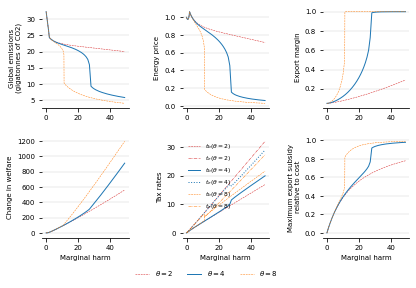

In [174]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
ax1.set_position([.1, .6, .2, .35])
ax2.set_position([.425, .6, .2, .35])
ax3.set_position([.75, .6, .2, .35])
ax4.set_position([.1, .15, .2, .35])
ax5.set_position([.425, .15, .2, .35])
ax6.set_position([.75, .15, .2, .35])


for ax in fig.get_axes():
    #ax.set_xlim(0,2)
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    
df1 = df_2[(df_2['regionbase']=='OECD37 as Home') & (df_2['tax_sce'] == 'Unilateral')] 
df1['eff_te']=df1['te']-df1['tb']
l3,=ax1.plot(df1['varphi'],df1['Qeworld_prime'], color='C3',linewidth=0.5,linestyle='dashed')
ax2.plot(df1['varphi'],df1['pe'], color='C3',linewidth=0.5,linestyle='dashed')
ax3.plot(df1['varphi'],df1['jxbar_prime'], color='C3',linewidth=0.5,linestyle='dashed')
ax4.plot(df1['varphi'],df1['welfare'], color='C3',linewidth=0.5,linestyle='dashed')
ax5.plot(df1['varphi'],df1['tb'], color='C3',linewidth=0.5,linestyle='dashed')
ax5.plot(df1['varphi'],df1['eff_te'], color='C3',linewidth=0.5,linestyle='dashdot')
ax6.plot(df1['varphi'],df1['subsidy_ratio'], color='C3',linewidth=0.5,linestyle='dashed')
    

df1 = df_4[(df_4['regionbase']=='OECD37 as Home') & (df_4['tax_sce'] == 'Unilateral')] 
df1['eff_te']=df1['te']-df1['tb']

l1,=ax1.plot(df1['varphi'],df1['Qeworld_prime'], color='C0',linewidth=1)
ax2.plot(df1['varphi'],df1['pe'], color='C0',linewidth=1)
ax3.plot(df1['varphi'],df1['jxbar_prime'], color='C0',linewidth=1)
ax4.plot(df1['varphi'],df1['welfare'], color='C0',linewidth=1)
ax5.plot(df1['varphi'],df1['tb'], color='C0',linewidth=1)
ax5.plot(df1['varphi'],df1['eff_te'], linestyle='dotted', color='C0',linewidth=1)
ax6.plot(df1['varphi'],df1['subsidy_ratio'], color='C0',linewidth=1)

df1 = df_8[(df_8['regionbase']=='OECD37 as Home') & (df_8['tax_sce'] == 'Unilateral')] 
df1['eff_te']=df1['te']-df1['tb']
l2,=ax1.plot(df1['varphi'],df1['Qeworld_prime'], color='C1',linewidth=0.5,linestyle='dashed')
ax2.plot(df1['varphi'],df1['pe'], color='C1',linewidth=0.5,linestyle='dashed')
ax3.plot(df1['varphi'],df1['jxbar_prime'], color='C1',linewidth=0.5,linestyle='dashed')
ax4.plot(df1['varphi'],df1['welfare'], color='C1',linewidth=0.5,linestyle='dashed')
ax5.plot(df1['varphi'],df1['tb'], color='C1',linewidth=0.5,linestyle='dashed')
ax5.plot(df1['varphi'],df1['eff_te'], color='C1',linewidth=0.5,linestyle='dashdot')
ax6.plot(df1['varphi'],df1['subsidy_ratio'], color='C1',linewidth=0.5,linestyle='dashed')

ax4.set_xlabel('Marginal harm')
ax5.set_xlabel('Marginal harm')
ax6.set_xlabel('Marginal harm')
ax1.set_ylabel('Global emissions \n(gigatonnes of CO2)')
ax2.set_ylabel('Energy price')
ax3.set_ylabel('Export margin')
ax4.set_ylabel('Change in welfare')
ax5.set_ylabel('Tax rates')
ax6.set_ylabel('Maximum export subsidy \nrelative to cost')


ax5.legend( (r"$t_b (\theta = 2)$", r"$t_e (\theta = 2)$", r"$t_b (\theta = 4)$", r"$t_e (\theta = 4)$", r"$t_b (\theta = 8)$", r"$t_e (\theta = 8)$"),fontsize=6, loc='upper left', 
            shadow=False, frameon=False)

ax4.legend(handles = [l3, l1,l2] , labels=[r"$\theta = 2$", r"$\theta = 4$", r"$\theta = 8$"],
            loc='upper left', bbox_to_anchor=(1, -0.25),fancybox=True, shadow=False, ncol=4, frameon=False)

plt.savefig(plot_root + '/theta8_fig1_big.pdf', format='pdf')

C:\Users\Alex\AppData\Local\Temp/ipykernel_18124/621185552.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['eff_te']=df1['te']-df1['tb']
C:\Users\Alex\AppData\Local\Temp/ipykernel_18124/621185552.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['eff_te']=df1['te']-df1['tb']
C:\Users\Alex\AppData\Local\Temp/ipykernel_18124/621185552.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

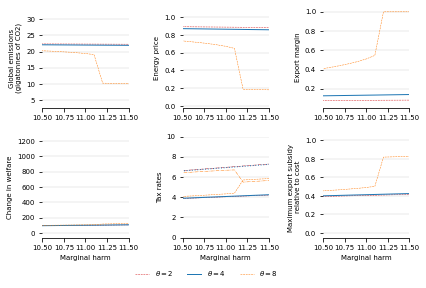

In [16]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
ax1.set_position([.1, .6, .2, .35])
ax2.set_position([.425, .6, .2, .35])
ax3.set_position([.75, .6, .2, .35])
ax4.set_position([.1, .15, .2, .35])
ax5.set_position([.425, .15, .2, .35])
ax6.set_position([.75, .15, .2, .35])


for ax in fig.get_axes():
    ax.set_xlim(10.5,11.5)
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    
df1 = df_2[(df_2['regionbase']=='OECD37 as Home') & (df_2['tax_sce'] == 'Unilateral')] 
df1['eff_te']=df1['te']-df1['tb']
l3,=ax1.plot(df1['varphi'],df1['Qeworld_prime'], color='C3',linewidth=0.5,linestyle='dashed')
ax2.plot(df1['varphi'],df1['pe'], color='C3',linewidth=0.5,linestyle='dashed')
ax3.plot(df1['varphi'],df1['jxbar_prime'], color='C3',linewidth=0.5,linestyle='dashed')
ax4.plot(df1['varphi'],df1['welfare'], color='C3',linewidth=0.5,linestyle='dashed')
ax5.plot(df1['varphi'],df1['tb'], color='C3',linewidth=0.5,linestyle='dashed')
ax5.plot(df1['varphi'],df1['eff_te'], color='C3',linewidth=0.5,linestyle='dashdot')
ax6.plot(df1['varphi'],df1['subsidy_ratio'], color='C3',linewidth=0.5,linestyle='dashed')
    

df1 = df_4[(df_4['regionbase']=='OECD37 as Home') & (df_4['tax_sce'] == 'Unilateral')] 
df1['eff_te']=df1['te']-df1['tb']

l1,=ax1.plot(df1['varphi'],df1['Qeworld_prime'], color='C0',linewidth=1)
ax2.plot(df1['varphi'],df1['pe'], color='C0',linewidth=1)
ax3.plot(df1['varphi'],df1['jxbar_prime'], color='C0',linewidth=1)
ax4.plot(df1['varphi'],df1['welfare'], color='C0',linewidth=1)
ax5.plot(df1['varphi'],df1['tb'], color='C0',linewidth=1)
ax5.plot(df1['varphi'],df1['eff_te'], linestyle='dotted', color='C0',linewidth=1)
ax6.plot(df1['varphi'],df1['subsidy_ratio'], color='C0',linewidth=1)

df1 = df_8[(df_8['regionbase']=='OECD37 as Home') & (df_8['tax_sce'] == 'Unilateral')] 
df1['eff_te']=df1['te']-df1['tb']
l2,=ax1.plot(df1['varphi'],df1['Qeworld_prime'], color='C1',linewidth=0.5,linestyle='dashed')
ax2.plot(df1['varphi'],df1['pe'], color='C1',linewidth=0.5,linestyle='dashed')
ax3.plot(df1['varphi'],df1['jxbar_prime'], color='C1',linewidth=0.5,linestyle='dashed')
ax4.plot(df1['varphi'],df1['welfare'], color='C1',linewidth=0.5,linestyle='dashed')
ax5.plot(df1['varphi'],df1['tb'], color='C1',linewidth=0.5,linestyle='dashed')
ax5.plot(df1['varphi'],df1['eff_te'], color='C1',linewidth=0.5,linestyle='dashdot')
ax6.plot(df1['varphi'],df1['subsidy_ratio'], color='C1',linewidth=0.5,linestyle='dashed')

ax4.set_xlabel('Marginal harm')
ax5.set_xlabel('Marginal harm')
ax6.set_xlabel('Marginal harm')
ax1.set_ylabel('Global emissions \n(gigatonnes of CO2)')
ax2.set_ylabel('Energy price')
ax3.set_ylabel('Export margin')
ax4.set_ylabel('Change in welfare')
ax5.set_ylabel('Tax rates')
ax6.set_ylabel('Maximum export subsidy \nrelative to cost')


#ax5.legend( (r"$t_b (\theta = 2)$", r"$t_e (\theta = 2)$", r"$t_b (\theta = 4)$", r"$t_e (\theta = 4)$", r"$t_b (\theta = 8)$", r"$t_e (\theta = 8)$"),fontsize=6, loc='upper left', 
#            shadow=False, frameon=False)

ax5.set_ylim(0,10)

ax4.legend(handles = [l3, l1,l2] , labels=[r"$\theta = 2$", r"$\theta = 4$", r"$\theta = 8$"],
            loc='upper left', bbox_to_anchor=(1, -0.25),fancybox=True, shadow=False, ncol=4, frameon=False)

plt.savefig(plot_root + '/theta8_fig1_detailed.pdf', format='pdf')

C:\Users\Alex\AppData\Local\Temp/ipykernel_19052/2568133818.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Qeworld_chg']=-(df1['Qeworld_prime']-32.2760)/32.2760*100;
C:\Users\Alex\AppData\Local\Temp/ipykernel_19052/2568133818.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Qeworld_chg']=-(df2['Qeworld_prime']-32.2760)/32.2760*100;
C:\Users\Alex\AppData\Local\Temp/ipykernel_19052/2568133818.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

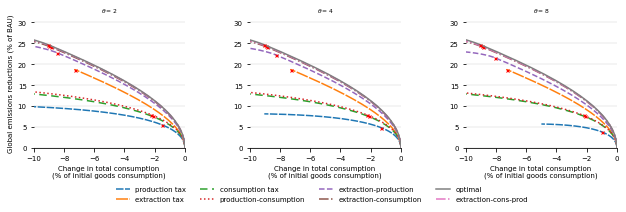

In [170]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
ax1.set_position([.1, .4, .35, .45])
ax2.set_position([.6, .4, .35, .45])
ax3.set_position([1.1, .4, .35, .45])

x=0
for ax in fig.get_axes():
    ax.set_xlim(-10,0)
    ax.set_ylim(0,31)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)

    x=x+1
    if x==1:
        df = pd.read_csv('../output_theta2/output_case3_analytical.csv')
    elif x==2:
        df = pd.read_csv('../output_theta4/output_case3_analytical.csv')
    elif x==3:
        df = pd.read_csv('../output_theta8/output_case3_analytical.csv')

    Qeworld=df['Qeworld_prime'][1]
    df['chg_Qeworld']=df['chg_Qeworld']/Qeworld*100
    
    ##puretp
    df1=df[(df['tax_sce']=='puretp') & (df['region_scenario']==3)] 
    df1['Qeworld_chg']=-(df1['Qeworld_prime']-32.2760)/32.2760*100;
    l1, = ax.plot(df1['welfare_noexternality'],df1['Qeworld_chg'],linestyle='dashed',dashes = (5,1))
    dot=df1[df1['varphi']==2] #puretp
    ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point') 
       
    ##purete
    df2=df[(df['tax_sce']=='purete') & (df['region_scenario']==3)] 
    df2['Qeworld_chg']=-(df2['Qeworld_prime']-32.2760)/32.2760*100;
    l2, = ax.plot(df2['welfare_noexternality'],df2['Qeworld_chg'],linestyle='dashed',dashes = (8,1))
    dot=df2[df2['varphi']==2] #puretp
    ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point') 
    
    ##puretc
    df3=df[(df['tax_sce']=='puretc') & (df['region_scenario']==3)] 
    df3['Qeworld_chg']=-(df3['Qeworld_prime']-32.2760)/32.2760*100;
    l3, = ax.plot(df3['welfare_noexternality'],df3['Qeworld_chg'],linestyle='dashed',dashes = (5,3))
    dot=df3[df3['varphi']==2] #puretp
    ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point') 
    
    ##production/consumption
    df4=df[(df['tax_sce']=='PC_hybrid') & (df['region_scenario']==3)] 
    df4['Qeworld_chg']=-(df4['Qeworld_prime']-32.2760)/32.2760*100;
    l4, = ax.plot(df4['welfare_noexternality'],df4['Qeworld_chg'],linestyle='dotted')
    dot=df4[df4['varphi']==2] #puretp
    ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point') 
    
    ##extracion/production
    df5=df[(df['tax_sce']=='EP_hybrid')  & (df['region_scenario']==3)] 
    df5['Qeworld_chg']=-(df5['Qeworld_prime']-32.2760)/32.2760*100;
    l5, = ax.plot(df5['welfare_noexternality'],df5['Qeworld_chg'],linestyle='dashed')
    dot=df5[df5['varphi']==2] #puretp
    ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point') 
  
    # #extraction/consumption
    df6=df[(df['tax_sce']=='EC_hybrid') & (df['region_scenario']==3)]
    df6['Qeworld_chg']=-(df6['Qeworld_prime']-32.2760)/32.2760*100;
    l6, = ax.plot(df6['welfare_noexternality'],df6['Qeworld_chg'],linestyle='dashdot')
    dot=df6[df6['varphi']==2] #puretp
    ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point') 
    
    # #extraction/consumption/production
    df6=df[(df['tax_sce']=='EPC_hybrid') & (df['region_scenario']==3)]
    df6['Qeworld_chg']=-(df6['Qeworld_prime']-32.2760)/32.2760*100;
    l8, = ax.plot(df6['welfare_noexternality'],df6['Qeworld_chg'],linestyle='dashdot')
    dot=df6[df6['varphi']==2] #puretp
    ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point') 
    
    ##unilateral optimal
    df7=df[(df['tax_sce']=='Unilateral') & (df['region_scenario']==3)] 
    df7['Qeworld_chg']=-(df7['Qeworld_prime']-32.2760)/32.2760*100;
    l7, = ax.plot(df7['welfare_noexternality'],df7['Qeworld_chg'],linestyle='solid')
    dot=df7[df7['varphi']==2] #puretp
    ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point') 


ax1.set_ylabel('Global emissions reductions (% of BAU)')
ax1.set_xlabel('Change in total consumption \n(% of initial goods consumption)')
ax2.set_xlabel('Change in total consumption \n(% of initial goods consumption)')
ax3.set_xlabel('Change in total consumption \n(% of initial goods consumption)')
ax1.set_title(r"$\theta = 2$", fontsize=6)
ax2.set_title(r"$\theta = 4$", fontsize=6)
ax3.set_title(r"$\theta = 8$", fontsize=6)


ax1.legend(handles = [l1,l2,l3,l4,l5,l6,l7,l8] , labels=['production tax', 'extraction tax','consumption tax','production-consumption',
                                                'extraction-production','extraction-consumption','optimal', 'extraction-cons-prod'],
            loc='upper left', bbox_to_anchor=(0.5, -0.25),fancybox=True, shadow=False, ncol=4, frameon=False)

plt.savefig(plot_root + '/theta_fig3.pdf', format='pdf', bbox_inches = 'tight')

C:\Users\Alex\AppData\Local\Temp/ipykernel_19052/3099994574.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Qeworld_chg']=-(df1['Qeworld_prime']-32.2760)/32.2760*100;
C:\Users\Alex\AppData\Local\Temp/ipykernel_19052/3099994574.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Qeworld_chg']=-(df2['Qeworld_prime']-32.2760)/32.2760*100;
C:\Users\Alex\AppData\Local\Temp/ipykernel_19052/3099994574.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

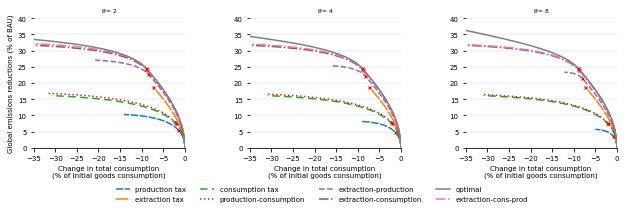

In [173]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.set_position([.1, .4, .35, .45])
ax2.set_position([.6, .4, .35, .45])
ax3.set_position([1.1, .4, .35, .45])

x=0
for ax in fig.get_axes():
    ax.set_xlim(-35,0)
    ax.set_ylim(0,40)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)

    x=x+1
    if x==1:
        df = pd.read_csv('../output_theta2/output_case3_analytical.csv')
    elif x==2:
        df = pd.read_csv('../output_theta4/output_case3_analytical.csv')
    elif x==3:
        df = pd.read_csv('../output_theta8/output_case3_analytical.csv')

    Qeworld=df['Qeworld_prime'][1]
    df['chg_Qeworld']=df['chg_Qeworld']/Qeworld*100
    
    ##puretp
    df1=df[(df['tax_sce']=='puretp') & (df['region_scenario']==3)] 
    df1['Qeworld_chg']=-(df1['Qeworld_prime']-32.2760)/32.2760*100;
    l1, = ax.plot(df1['welfare_noexternality'],df1['Qeworld_chg'],linestyle='dashed',dashes = (5,1))
    dot=df1[df1['varphi']==2] #puretp
    ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point') 
       
    ##purete
    df2=df[(df['tax_sce']=='purete') & (df['region_scenario']==3)] 
    df2['Qeworld_chg']=-(df2['Qeworld_prime']-32.2760)/32.2760*100;
    l2, = ax.plot(df2['welfare_noexternality'],df2['Qeworld_chg'],linestyle='dashed',dashes = (8,1))
    dot=df2[df2['varphi']==2] #puretp
    ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point') 
    
    ##puretc
    df3=df[(df['tax_sce']=='puretc') & (df['region_scenario']==3)] 
    df3['Qeworld_chg']=-(df3['Qeworld_prime']-32.2760)/32.2760*100;
    l3, = ax.plot(df3['welfare_noexternality'],df3['Qeworld_chg'],linestyle='dashed',dashes = (5,3))
    dot=df3[df3['varphi']==2] #puretp
    ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point') 
    
    ##production/consumption
    df4=df[(df['tax_sce']=='PC_hybrid') & (df['region_scenario']==3)] 
    df4['Qeworld_chg']=-(df4['Qeworld_prime']-32.2760)/32.2760*100;
    l4, = ax.plot(df4['welfare_noexternality'],df4['Qeworld_chg'],linestyle='dotted')
    dot=df4[df4['varphi']==2] #puretp
    ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point') 
    
    ##extracion/production
    df5=df[(df['tax_sce']=='EP_hybrid')  & (df['region_scenario']==3)] 
    df5['Qeworld_chg']=-(df5['Qeworld_prime']-32.2760)/32.2760*100;
    l5, = ax.plot(df5['welfare_noexternality'],df5['Qeworld_chg'],linestyle='dashed')
    dot=df5[df5['varphi']==2] #puretp
    ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point') 
  
    # #extraction/consumption
    df6=df[(df['tax_sce']=='EC_hybrid') & (df['region_scenario']==3)]
    df6['Qeworld_chg']=-(df6['Qeworld_prime']-32.2760)/32.2760*100;
    l6, = ax.plot(df6['welfare_noexternality'],df6['Qeworld_chg'],linestyle='dashdot')
    dot=df6[df6['varphi']==2] #puretp
    ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point') 
    
    # #extraction/consumption/production
    df6=df[(df['tax_sce']=='EPC_hybrid') & (df['region_scenario']==3)]
    df6['Qeworld_chg']=-(df6['Qeworld_prime']-32.2760)/32.2760*100;
    l8, = ax.plot(df6['welfare_noexternality'],df6['Qeworld_chg'],linestyle='dashdot')
    dot=df6[df6['varphi']==2] #puretp
    ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point') 
    
    ##unilateral optimal
    df7=df[(df['tax_sce']=='Unilateral') & (df['region_scenario']==3)] 
    df7['Qeworld_chg']=-(df7['Qeworld_prime']-32.2760)/32.2760*100;
    l7, = ax.plot(df7['welfare_noexternality'],df7['Qeworld_chg'],linestyle='solid')
    dot=df7[df7['varphi']==2] #puretp
    ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point') 


ax1.set_ylabel('Global emissions reductions (% of BAU)')
ax1.set_xlabel('Change in total consumption \n(% of initial goods consumption)')
ax2.set_xlabel('Change in total consumption \n(% of initial goods consumption)')
ax3.set_xlabel('Change in total consumption \n(% of initial goods consumption)')
ax1.set_title(r"$\theta = 2$", fontsize=6)
ax2.set_title(r"$\theta = 4$", fontsize=6)
ax3.set_title(r"$\theta = 8$", fontsize=6)


ax1.legend(handles = [l1,l2,l3,l4,l5,l6,l7,l8] , labels=['production tax', 'extraction tax','consumption tax','production-consumption',
                                                'extraction-production','extraction-consumption','optimal', 'extraction-cons-prod'],
            loc='upper left', bbox_to_anchor=(0.5, -0.25),fancybox=True, shadow=False, ncol=4, frameon=False)

plt.savefig(plot_root + '/theta_fig3_big.pdf', format='pdf', bbox_inches = 'tight')

In [6]:
def plot_tax(fig, lodf, xlow = -35, xhigh = 0, ylow = 0, yhigh = 40):
    i=0
    for ax in fig.get_axes():
        ax.set_xlim(xlow,xhigh)
        ax.set_ylim(ylow,yhigh)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(True)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        
        df = lodf[i]
        i += 1

        Qeworld=df['Qeworld_prime'][0]
        df['Qeworld_chg']=-(df['Qeworld_prime']-Qeworld)/Qeworld*100

        ##puretp
        df1=df[(df['tax_sce']=='puretp') & (df['region_scenario']==3)] 
        l1, = ax.plot(df1['welfare_noexternality'],df1['Qeworld_chg'],linestyle='dashed',dashes = (5,1), label = 'production tax')
        dot=df1[df1['varphi']==2] #puretp
        ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red') 

        ##purete
        df2=df[(df['tax_sce']=='purete') & (df['region_scenario']==3)] 
        l2, = ax.plot(df2['welfare_noexternality'],df2['Qeworld_chg'],linestyle='dashed',dashes = (8,1), label = 'extraction tax')
        dot=df2[df2['varphi']==2] #puretp
        ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red') 

        ##puretc
        df3=df[(df['tax_sce']=='puretc') & (df['region_scenario']==3)] 
        l3, = ax.plot(df3['welfare_noexternality'],df3['Qeworld_chg'],linestyle='dashed',dashes = (5,3), label = 'consumption tax')
        dot=df3[df3['varphi']==2] #puretp
        ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red') 

        ##production/consumption
        df4=df[(df['tax_sce']=='PC_hybrid') & (df['region_scenario']==3)] 
        l4, = ax.plot(df4['welfare_noexternality'],df4['Qeworld_chg'],linestyle='dotted', label = 'production-consumption')
        dot=df4[df4['varphi']==2] #puretp
        ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red') 

        ##extracion/production
        df5=df[(df['tax_sce']=='EP_hybrid')  & (df['region_scenario']==3)] 
        l5, = ax.plot(df5['welfare_noexternality'],df5['Qeworld_chg'],linestyle='dashed', label = 'extraction-production')
        dot=df5[df5['varphi']==2] #puretp
        ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red') 

        # #extraction/consumption
        df6=df[(df['tax_sce']=='EC_hybrid') & (df['region_scenario']==3)]
        l6, = ax.plot(df6['welfare_noexternality'],df6['Qeworld_chg'],linestyle='dashdot', label = 'extraction-consumption')
        dot=df6[df6['varphi']==2] #puretp
        ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red') 

        # #extraction/consumption/production
        df6=df[(df['tax_sce']=='EPC_hybrid') & (df['region_scenario']==3)]
        l8, = ax.plot(df6['welfare_noexternality'],df6['Qeworld_chg'],linestyle='dashdot', label = 'extraction-cons-prod')
        dot=df6[df6['varphi']==2] #puretp
        ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red') 

        ##unilateral optimal
        df7=df[(df['tax_sce']=='Unilateral') & (df['region_scenario']==3)] 
        l7, = ax.plot(df7['welfare_noexternality'],df7['Qeworld_chg'],linestyle='solid', label = 'unilateral optimal')
        dot=df7[df7['varphi']==2] #puretp
        ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red') 

In [11]:
df_2 = pd.read_csv('../output_theta2/output_case3_analytical.csv')
df_4 = pd.read_csv('../output_theta4/output_case3_analytical.csv')
df_8 = pd.read_csv('../output_theta8/output_case3_analytical.csv')
df_2e = pd.read_csv('../output_theta2/output_case3_D_2.csv')
df_4e = pd.read_csv('../output_theta4/output_case3_D_2.csv')
df_8e = pd.read_csv('../output_theta8/output_case3_D_2.csv')

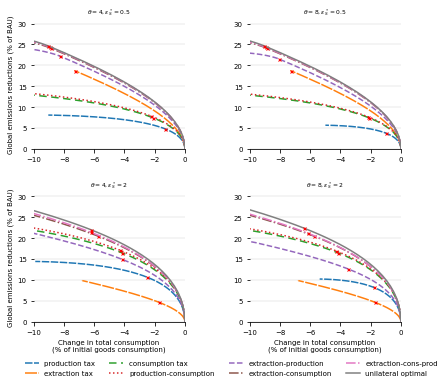

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.set_position([.1, 1, .35, .45])
ax2.set_position([.6, 1, .35, .45])
ax3.set_position([.1, .4, .35, .45])
ax4.set_position([.6, .4, .35, .45])

plot_tax(fig, [df_4, df_8, df_4e, df_8e], xlow = -10, yhigh = 31)



ax1.set_ylabel('Global emissions reductions (% of BAU)')
ax3.set_ylabel('Global emissions reductions (% of BAU)')
ax3.set_xlabel('Change in total consumption \n(% of initial goods consumption)')
ax4.set_xlabel('Change in total consumption \n(% of initial goods consumption)')
ax1.set_title(r"$\theta = 4, \epsilon_S^* = 0.5$", fontsize=6)
ax2.set_title(r"$\theta = 8, \epsilon_S^* = 0.5$", fontsize=6)
ax3.set_title(r"$\theta = 4, \epsilon_S^* = 2$", fontsize=6) 
ax4.set_title(r"$\theta = 8, \epsilon_S^* = 2$", fontsize=6) 

ax3.legend(loc='upper left', bbox_to_anchor=(-0.1, -0.25),fancybox=True, shadow=False, ncol=4, frameon=False)

plt.savefig(plot_root + '/temp.pdf', format='pdf', bbox_inches = 'tight')